<a href="https://colab.research.google.com/github/jjresusta/bts-dsf-2020/blob/branch-2/Copia_de_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset that I will use for this asssingment contains information taken from UCI heart disease patients from 4 different hospitals these are:
1. Hungarian Institute of Cardiology,Budapest. 
2. University Hospital, Zurich, Switzerland. 
3. University Hospital, Basel, Switzerland and 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.

The columns of the dataset contain the following variables:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Heart disease 1, no heart disease 0


During this project I will using all the features available try and build a model that accurately predicts if a patient does suffer or not from accute heart disease. 

First however we will clean the data and do a brief exploratory analysis of it.

In [10]:
!pip install sklearn

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import imageio as imageio
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [12]:
uci = pd.read_csv("heart.csv")
uci.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [13]:
uci.shape

(303, 14)

In [14]:
uci2 = uci.isnull().value_counts()
uci2
#There are no null values

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64

In [15]:
uci.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [16]:
#We now use a bar plot to visualize how split our target is.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


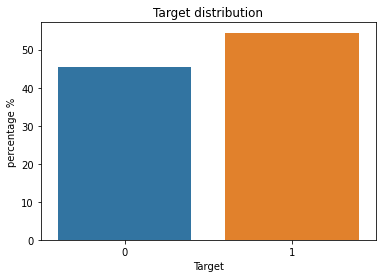

In [17]:
sns.barplot(uci.target.value_counts().index,100*uci.target.value_counts(normalize = True))
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('percentage %')
plt.show()

In [18]:
#As we can see our target value is reasonably split.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


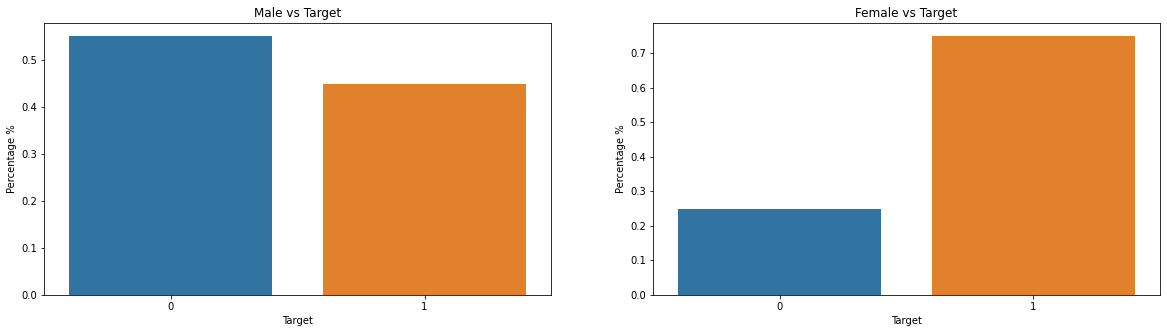

In [19]:
#If we want to further explore the data we could also plot a bar chart to see how accute heart disease affects different genders.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(uci[uci.sex == 1].target.value_counts().index,uci[uci.sex == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Male vs Target')
plt.subplot(1,2,2)
sns.barplot(uci[uci.sex == 0].target.value_counts().index,uci[uci.sex == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Female vs Target')
plt.show()

In [20]:
#As we can see women are more prone to develope heart disease than men.

In [21]:
#We can also plot the distribution of some key variables.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Resting blood pressure distribution')

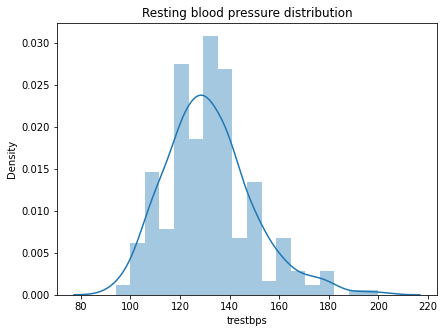

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(uci.trestbps)
plt.title('Resting blood pressure distribution')
#As we can see resting blood pressure is unevenly distributed with a slight skew to the left

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'maximum heart rate achieved distribution')

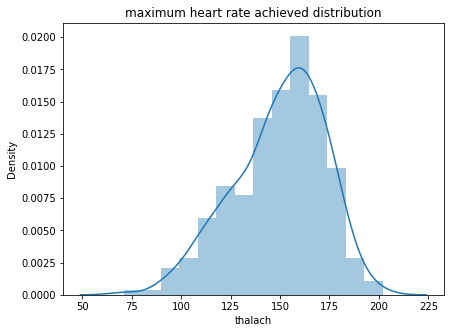

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(uci.thalach)
plt.title('maximum heart rate achieved distribution')
#Again we can see maximum heart rate achieved seems slightly uneverly distributed with a skew to the right

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'cholesterol distribution')

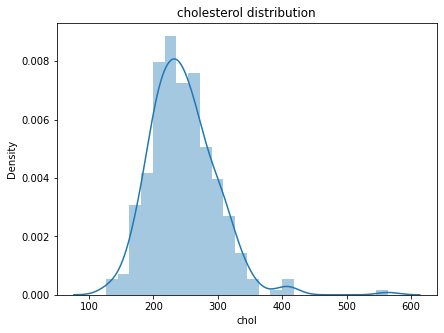

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(uci.chol)
plt.title('cholesterol distribution')
#Cholesterol seems more evenly distributed with a mean probably around 210 and a skew to the left

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'age')

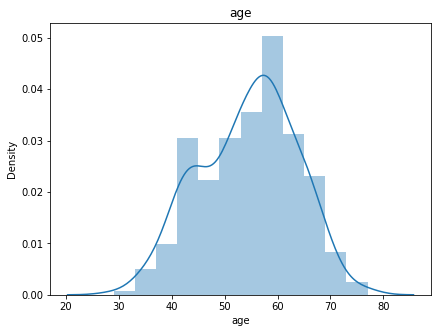

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(uci.age)
plt.title('age')
#Age shows a clearly uneven distribution.

In [26]:
uci_corr = uci.corr()
uci_corr > 0.5
#Thanks to pandas corr tool we can also see that no values are strongly correlated.

age    sex     cp  trestbps  ...  slope     ca   thal  target
age        True  False  False     False  ...  False  False  False   False
sex       False   True  False     False  ...  False  False  False   False
cp        False  False   True     False  ...  False  False  False   False
trestbps  False  False  False      True  ...  False  False  False   False
chol      False  False  False     False  ...  False  False  False   False
fbs       False  False  False     False  ...  False  False  False   False
restecg   False  False  False     False  ...  False  False  False   False
thalach   False  False  False     False  ...  False  False  False   False
exang     False  False  False     False  ...  False  False  False   False
oldpeak   False  False  False     False  ...  False  False  False   False
slope     False  False  False     False  ...   True  False  False   False
ca        False  False  False     False  ...  False   True  False   False
thal      False  False  False     False  ...  False  False   True   False
target    False  False  False     False  ...  False  False  False    True

[14 rows x 14 columns]

In [27]:
uci_corr[uci_corr == True].count()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
target      1
dtype: int64

In [28]:
uci3 = uci.corr()
uci3
#We show here the actual values

age       sex        cp  ...        ca      thal    target
age       1.000000 -0.098447 -0.068653  ...  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353  ...  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  ... -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  ...  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  ...  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  ...  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421  ... -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762  ... -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  ...  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  ...  0.222682  0.210244 -0.430696
slope    -0.168814 -0.030711  0.119717  ... -0.080155 -0.104764  0.345877
ca        0.276326  0.118261 -0.181053  ...  1.000000  0.151832 -0.391724
thal      0.068001  0.210041 -0.161736  ...  0.151832  1.000000 -0.344029
target   -0.225439 -0.280937  0.433798  ... -0.391724 -0.344029  1.000000

[14 rows x 14 columns]

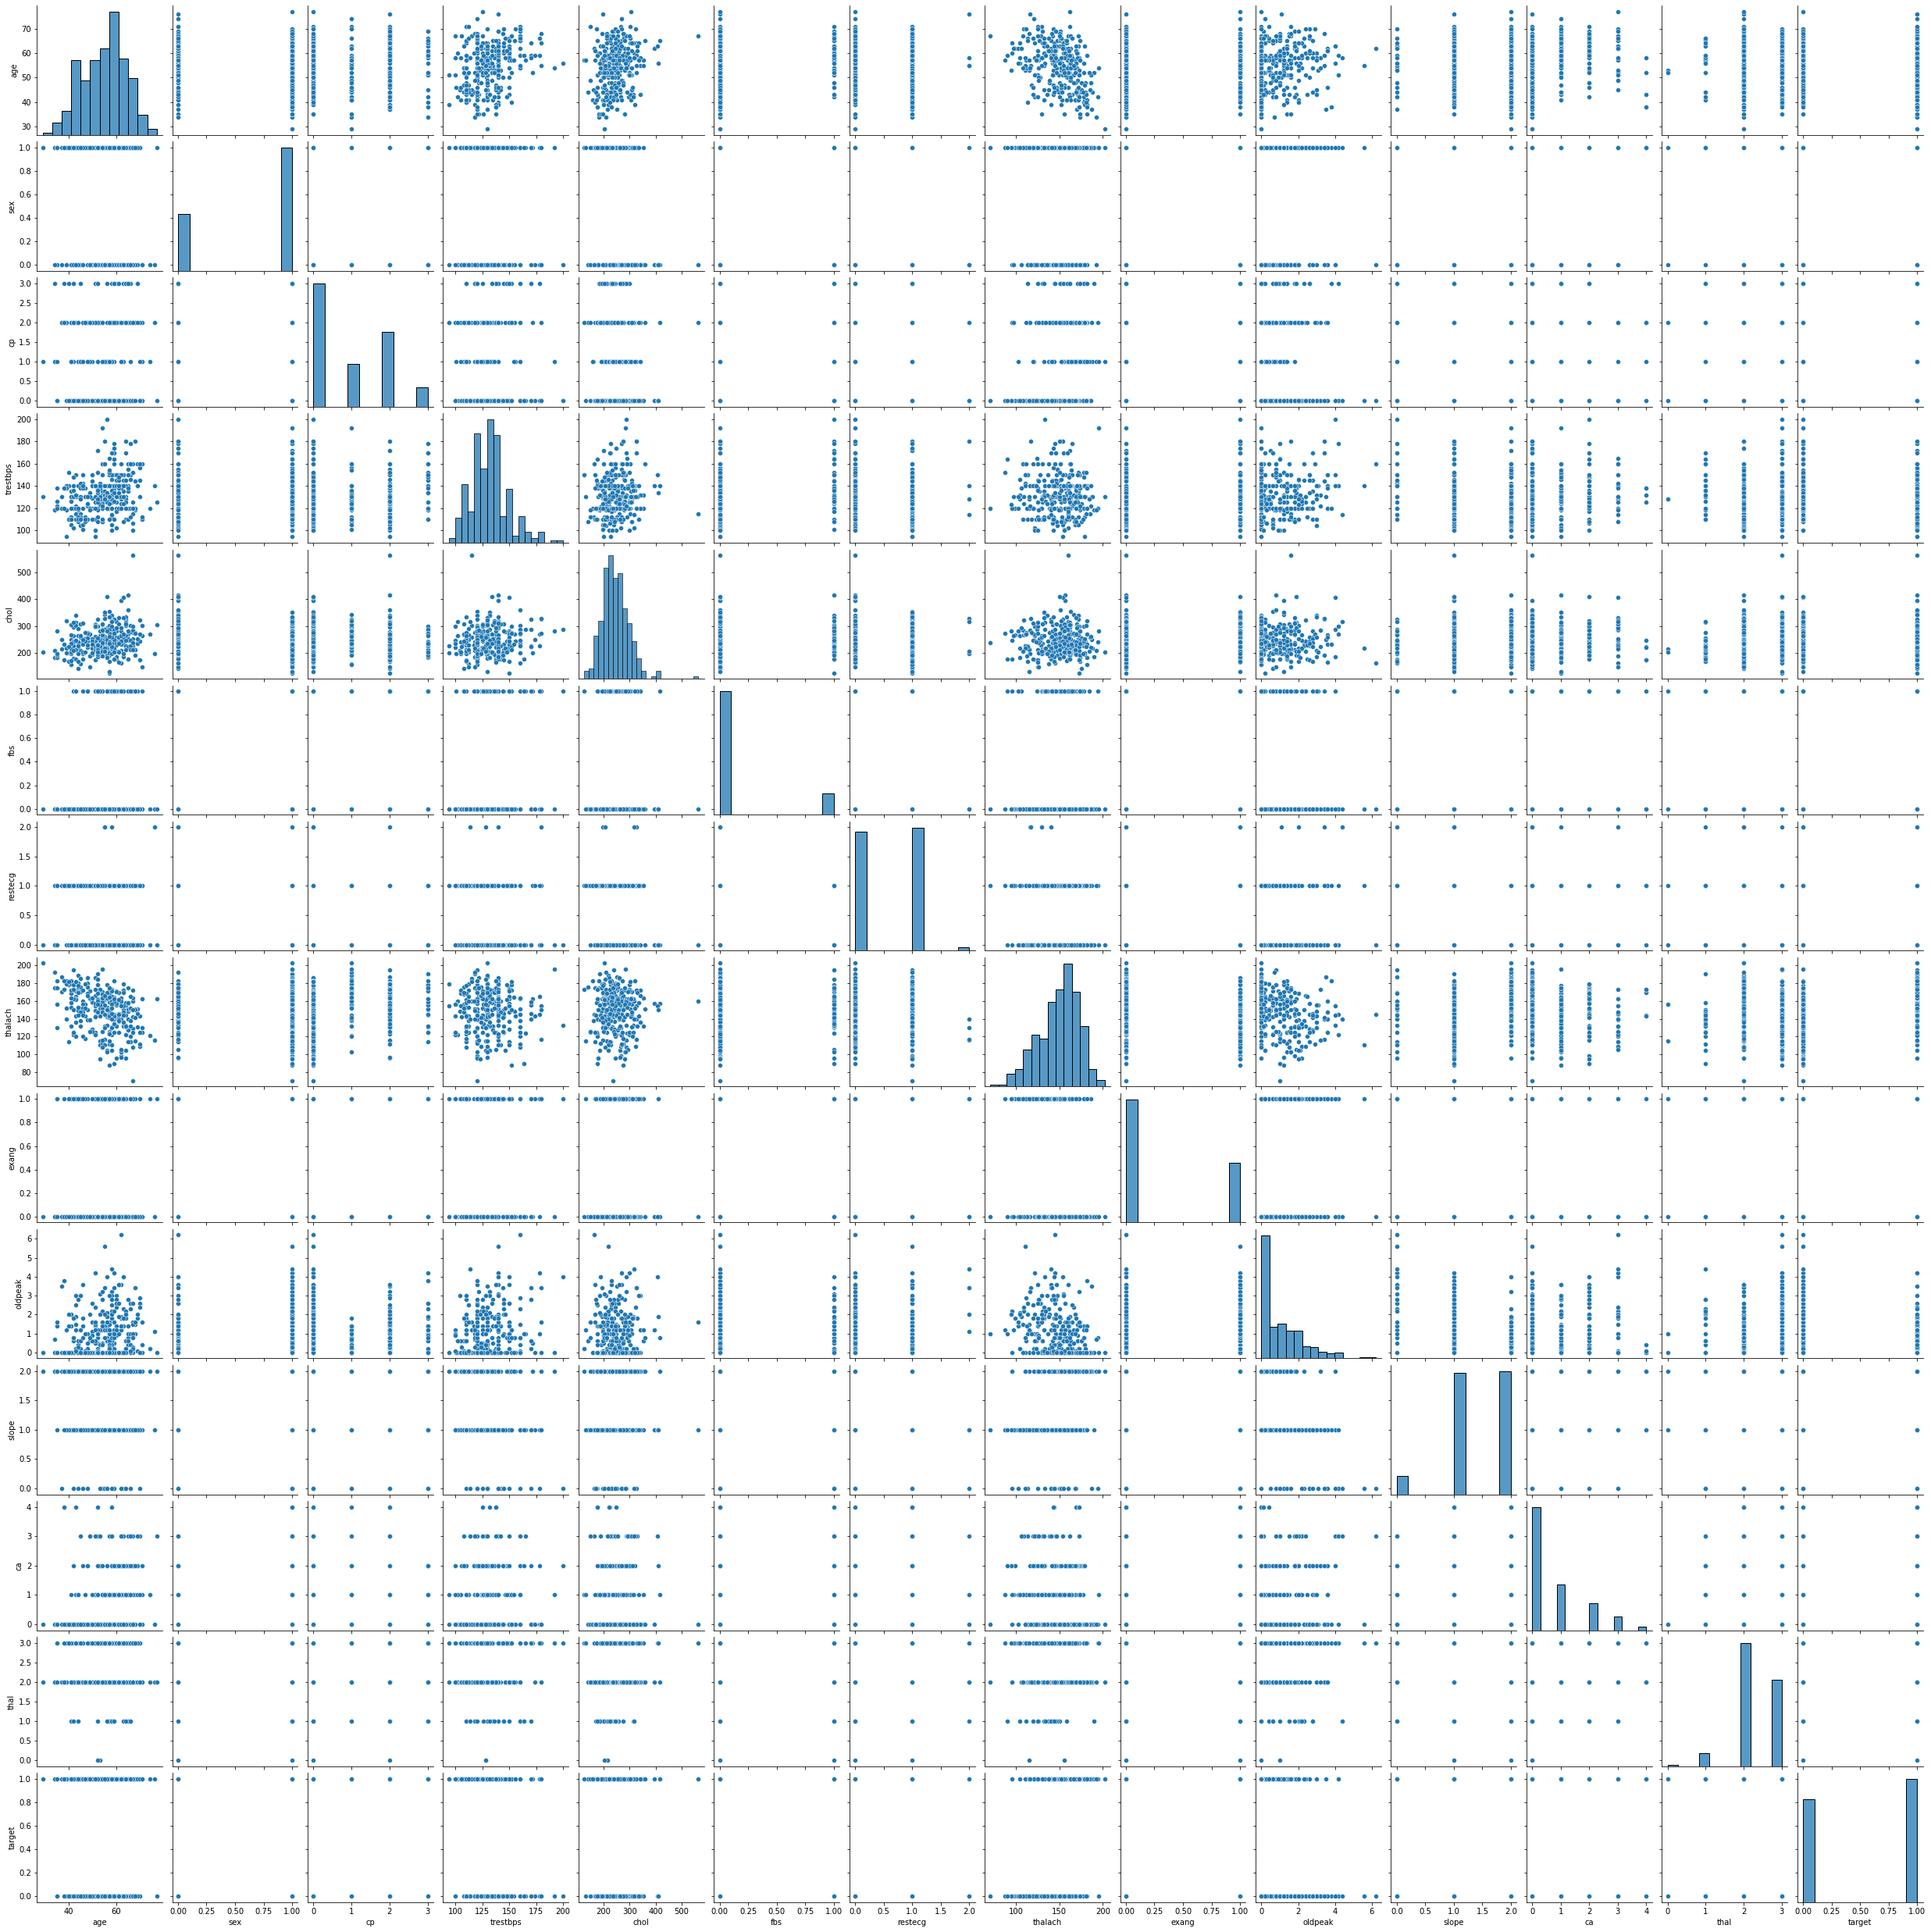

In [29]:
sns.pairplot(uci)
#Finally we show some pairplots to show some potentially interesting relationships between features.

Now we finally start to build the model that will predict if a patient has accute heart disease

In [30]:
X = uci.drop('target',1)
y = uci.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state=0)
#We split our data into train test split into a 50%/50% split in order to perform a cross validation later on

In [31]:
#Given the wide range of values we proceed to normalize the data in order to be able to feed it to an algorithm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_train.head()
X_test = pd.DataFrame(X_test, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_test.head()

age  sex        cp  trestbps  ...   oldpeak  slope    ca  thal
0  0.976190  1.0  0.000000    0.5625  ...  0.419355    0.0  0.00   1.0
1  0.833333  1.0  1.000000    0.8750  ...  0.096774    0.5  0.00   1.0
2  0.714286  1.0  1.000000    0.8750  ...  0.032258    0.5  0.00   1.0
3  0.738095  1.0  0.000000    0.3125  ...  0.451613    0.5  0.25   1.0
4  0.785714  1.0  0.666667    0.3750  ...  0.290323    0.5  0.75   1.0

[5 rows x 13 columns]

Now we need to choose an algorithm. In order to do this we will use sklearns diagram that allows us to choose the one that best suites our data. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
 We understand that we have continous data from which we are trying to predict a certain category (1 ill or 0 healthy) the diagram then indicates us that since we have labeled data and less than 100k observations we should use a linear svc to predict our target

In [32]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = LinearSVC()
y2_model = model.fit(X_train, y_train)
y1_model = model.fit(X_test, y_test)
y2_predict =  y2_model.predict(X_test)
y1_predict = y1_model.predict(X_train)
print("accuracy set's 1 and 2:", accuracy_score(y_train, y1_predict), accuracy_score(y_test, y2_predict))
print("recall set's 1 and 2:", metrics.recall_score(y_train, y1_predict),metrics.recall_score(y_test, y2_predict))
print("precision score set's 1 and 2:",metrics.precision_score(y_train,y1_predict),metrics.precision_score(y_test,y2_predict))

#Appyling both models we get decent accuracies for both validation sets (both above 80%) with good recall scores and moderately good precision scores. 


accuracy set's 1 and 2: 0.847682119205298 0.8289473684210527
recall set's 1 and 2: 0.9024390243902439 0.891566265060241
precision score set's 1 and 2: 0.8314606741573034 0.8131868131868132
